In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_2021_2022.csv')

# Create price categories based on quantiles
df['precio_category'] = pd.qcut(df['precio_pesos_constantes'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Create a combined stratification category
df['stratify_category'] = df['precio_category'].astype(str) + "_" + df['year'].astype(str)

# Perform the stratified split
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df['stratify_category'], random_state=42)

<ipython-input-8-596b2a1fc82e>:5: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,32,35,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_2021_2022.csv')


In [9]:
# Show the results
print("Train set distribution:")
print(train_df['year'].value_counts(normalize=True))

print("\nTest set distribution:")
print(test_df['year'].value_counts(normalize=True))

Train set distribution:
year
2021    0.518224
2022    0.481776
Name: proportion, dtype: float64

Test set distribution:
year
2021    0.518243
2022    0.481757
Name: proportion, dtype: float64


In [10]:
# Show the results
print("Train set distribution:")
print(train_df['precio_category'].value_counts(normalize=True))

print("\nTest set distribution:")
print(test_df['precio_category'].value_counts(normalize=True))

Train set distribution:
precio_category
Bajo        0.250498
Alto        0.250067
Muy Alto    0.249924
Medio       0.249511
Name: proportion, dtype: float64

Test set distribution:
precio_category
Bajo        0.250500
Alto        0.250048
Muy Alto    0.249952
Medio       0.249500
Name: proportion, dtype: float64


In [11]:
# Optional: Drop the category columns if not needed
train_df.drop(columns=['precio_category', 'stratify_category','Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
test_df.drop(columns=['precio_category', 'stratify_category','Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Save the datasets
train_df.to_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv', index=False)
test_df.to_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_test.csv', index=False)

In [12]:
train_df.columns

Index(['id_grid', 'MesListing', 'TIPOPROPIEDAD', 'STotalM2', 'SConstrM2',
       'Dormitorios', 'Banos', 'Ambientes', 'SitioOrigen', 'Amoblado',
       'Antiguedad', 'Cisterna', 'AccesoInternet', 'BusinessCenter',
       'Gimnasio', 'Laundry', 'Calefaccion', 'SalonDeUsosMul', 'AireAC',
       'Recepcion', 'Estacionamiento', 'Jacuzzi', 'AreaJuegosInfantiles',
       'Chimenea', 'Ascensor', 'SalonFiestas', 'Seguridad', 'Pileta',
       'Cocheras', 'PistaJogging', 'EstacionamientoVisitas', 'Lobby',
       'LocalesComerciales', 'SistContraIncendios', 'AreaParrillas',
       'CanchaTennis', 'AreaCine', 'ITE_ADD_CITY_NAME', 'ITE_ADD_STATE_NAME',
       'ITE_ADD_NEIGHBORHOOD_NAME', 'ITE_TIPO_PROD', 'LONGITUDE', 'LATITUDE',
       'precio_pesos_constantes', 'year'],
      dtype='object')

In [13]:
train_df.head()

,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,...,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
250913,59362,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,...,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
47134,68287,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,...,0,0,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
114943,59774,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,...,0,0,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
290392,62402,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,...,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
50369,57804,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,...,No,0,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


<ipython-input-17-baa7af7fd520>:6: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv')


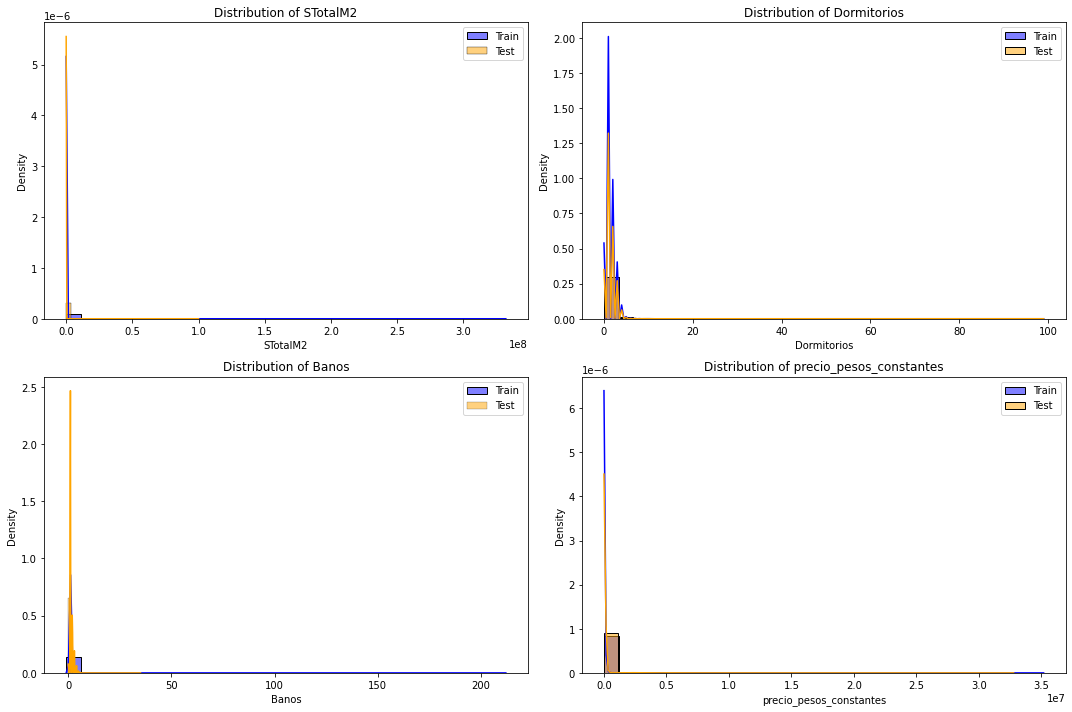

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train and test datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_test.csv')

# Define the variables to compare
variables_to_plot = ['STotalM2', 'Dormitorios', 'Banos', 'precio_pesos_constantes']

# Set up the plotting environment
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_to_plot):
    plt.subplot(2, 2, i + 1)
    
    # Plot for training set
    sns.histplot(train_df[var], kde=True, color='blue', label='Train', stat='density', bins=30, alpha=0.5)
    
    # Plot for test set
    sns.histplot(test_df[var], kde=True, color='orange', label='Test', stat='density', bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


### Double check splits are correct

<ipython-input-1-16482906489f>:6: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv')


id_grid - Train mean: 59833.06, Test mean: 59887.09
id_grid - Train std: 14774.01, Test std: 14618.43
STotalM2 - Train mean: 3739.94, Test mean: 3434.50
STotalM2 - Train std: 949244.50, Test std: 568360.98
SConstrM2 - Train mean: 33568.31, Test mean: 3391.59
SConstrM2 - Train std: 8415216.68, Test std: 568326.84
Dormitorios - Train mean: 1.42, Test mean: 1.42
Dormitorios - Train std: 1.20, Test std: 1.18
Banos - Train mean: 1.34, Test mean: 1.33
Banos - Train std: 1.02, Test std: 0.83
Ambientes - Train mean: 2.39, Test mean: 2.40
Ambientes - Train std: 1.39, Test std: 1.51
Cocheras - Train mean: 0.40, Test mean: 0.43
Cocheras - Train std: 2.09, Test std: 5.91
PistaJogging - Train mean: 0.00, Test mean: 0.00
PistaJogging - Train std: 0.00, Test std: 0.00
Lobby - Train mean: 0.00, Test mean: 0.00
Lobby - Train std: 0.00, Test std: 0.00
LocalesComerciales - Train mean: 0.00, Test mean: 0.00
LocalesComerciales - Train std: 0.00, Test std: 0.00
AreaParrillas - Train mean: 0.04, Test mean: 0

<ipython-input-1-16482906489f>:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_df[column].dropna(), color='red', label='Train', fill=True, alpha=0.3)
<ipython-input-1-16482906489f>:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(test_df[column].dropna(), color='blue', label='Test', fill=True, alpha=0.3)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-1-16482906489f>:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_df[column].dropna(), color='red', label='Train', fill=True, alpha=0.3)
<ipython-input-1-16482906489f>:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular

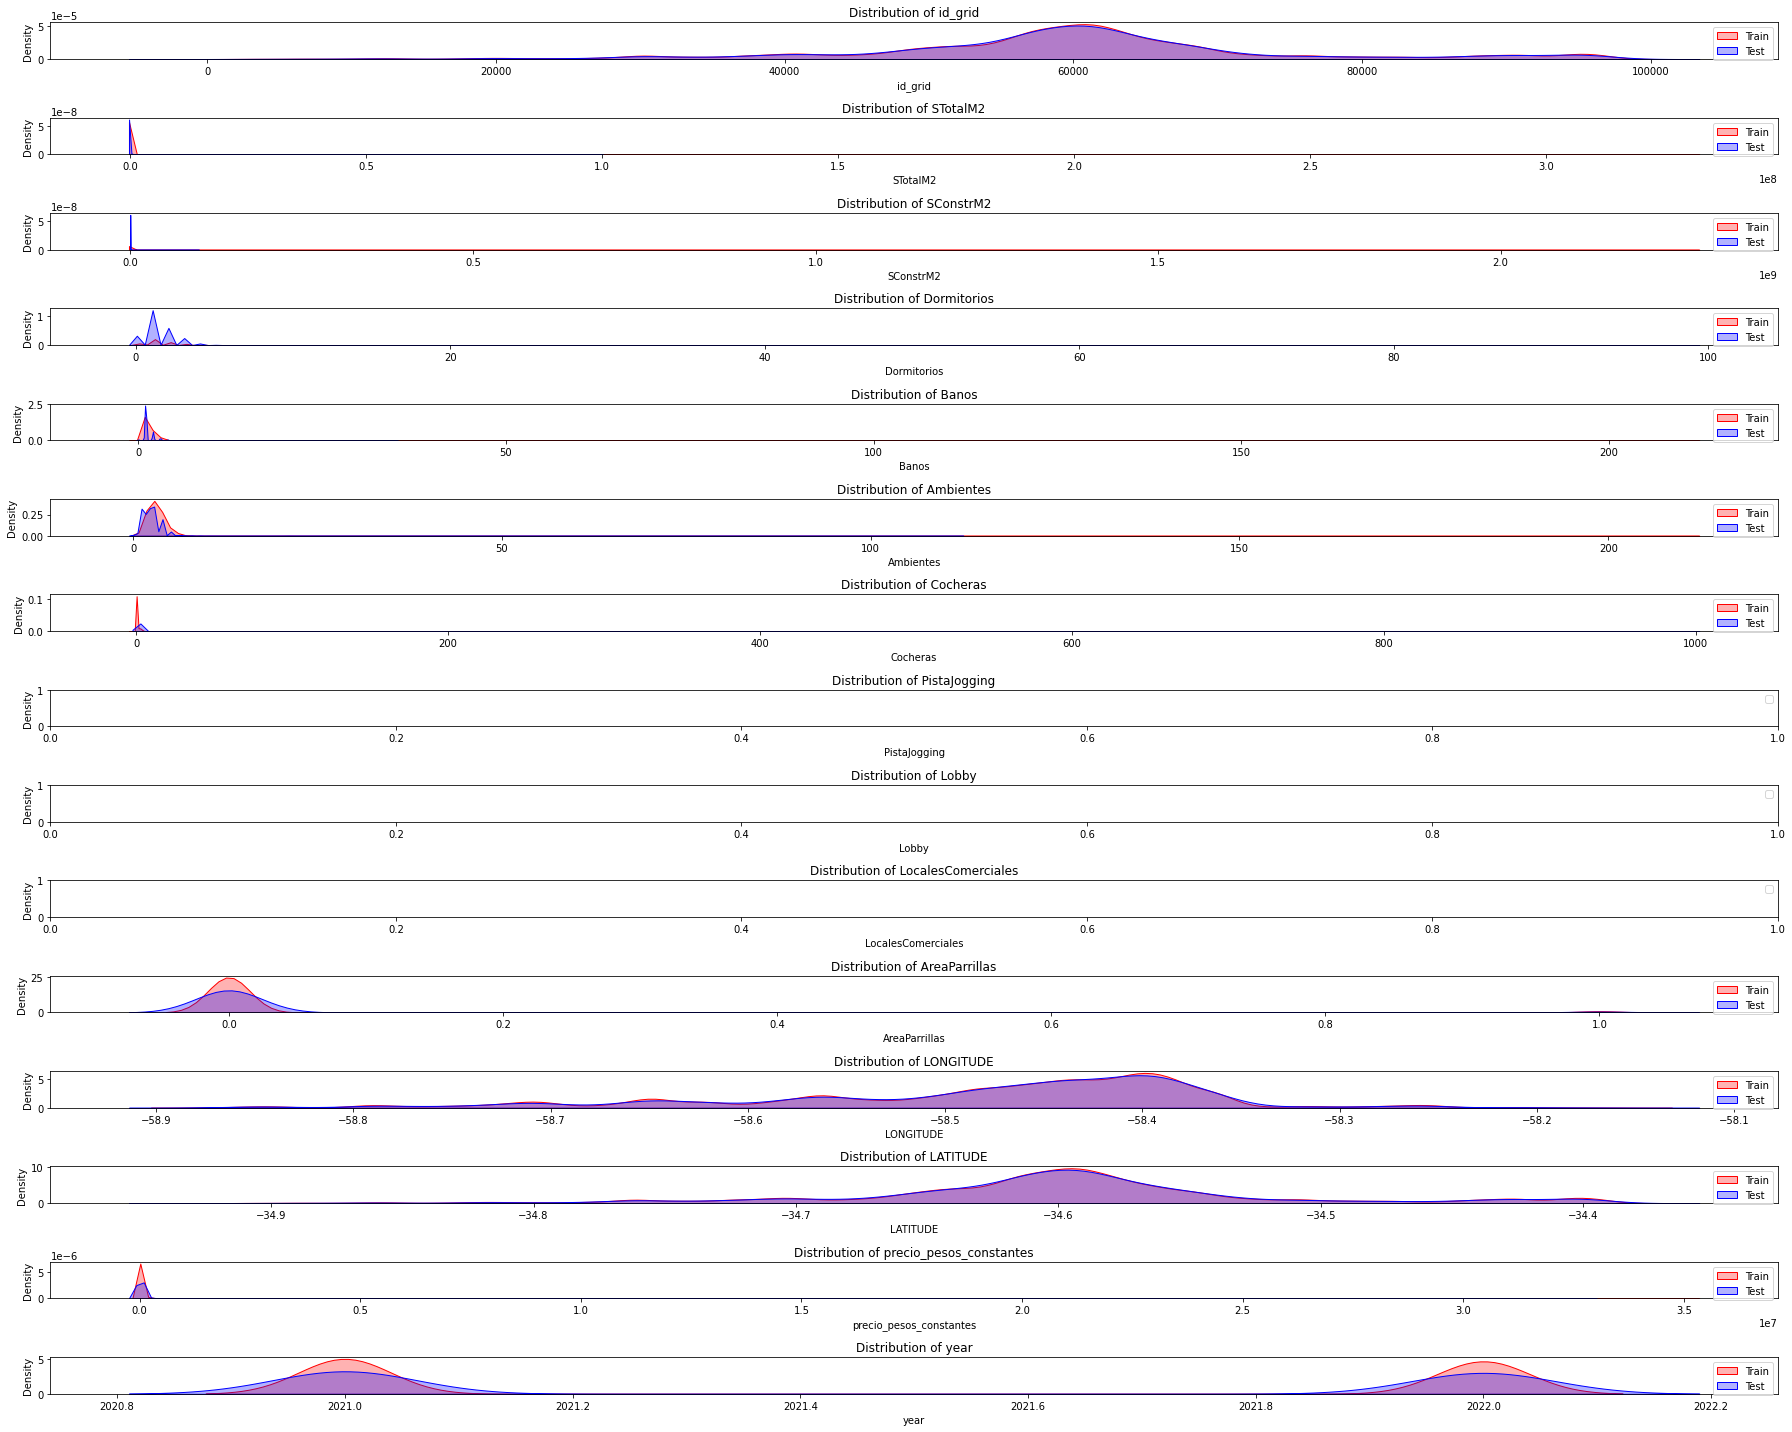

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_test.csv')

# Select numeric columns for comparison (adjust as necessary)
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean and standard deviation for train and test sets
for column in numeric_columns:
    train_mean = train_df[column].mean()
    train_std = train_df[column].std()
    test_mean = test_df[column].mean()
    test_std = test_df[column].std()
    print(f"{column} - Train mean: {train_mean:.2f}, Test mean: {test_mean:.2f}")
    print(f"{column} - Train std: {train_std:.2f}, Test std: {test_std:.2f}")

# Create a figure for the plots
plt.figure(figsize=(25, 20))

# Loop through each numeric column and create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.kdeplot(train_df[column].dropna(), color='red', label='Train', fill=True, alpha=0.3)
    sns.kdeplot(test_df[column].dropna(), color='blue', label='Test', fill=True, alpha=0.3)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv')

# Seleccionar las características categóricas
categorical_features = df.select_dtypes(include=['object']).columns

# Mostrar los valores únicos de cada característica categórica
for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f"{feature}: {unique_values}")

<ipython-input-2-fd8c3b9501ba>:4: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/alquiler_AMBA_dev.csv')


MesListing: ['2022-08-01' '2021-04-01' '2021-09-01' '2022-11-01' '2021-11-01'
 '2022-05-01' '2022-01-01' '2021-06-01' '2021-10-01' '2022-10-01'
 '2021-01-01' '2022-03-01' '2021-05-01' '2022-04-01' '2022-12-01'
 '2021-08-01' '2022-02-01' '2022-06-01' '2022-07-01' '2021-02-01'
 '2021-12-01' '2021-03-01' '2021-07-01' '2022-09-01']
TIPOPROPIEDAD: ['Departamento']
SitioOrigen: [nan '0' '0.0' 'administracional.com.ar' 0.0 'churbapropiedades.com.ar']
Amoblado: ['0.0' 'No' nan '0' '1.0' '1' '   0' 'Sí']
Antiguedad: ['0.0' '7 años' '40 años' '50.0' '0' '2 años' '20' '4 años' '0 años' nan
 '35 años' '45 años' '35.0' '15' '8 años' '62 años' '   0' '40.0' '42.0'
 '10' '6 años' '12.0' '10 años' '40' '45' '3 años' '20.0' '9 años'
 '30 años' '20 años' '50' '15.0' '50 años' '15 años' '10.0' '17 años'
 '41 años' '110 años' '75.0' '25 años' '5' '9.0' '12' '13.0' '6.0'
 '51 años' '1 años' '16 años' '22.0' '60 años' '18' '3' '22' '5 años'
 '33.0' '62' '25.0' '62.0' '60.0' '11.0' '45.0' '30.0' '48 años' '4